Notes

Now Using Python / Jupyter

Plan on splitting work into four parts

Data Scrapping
Data Cleaning / Filtering
Data Visualizations
Analytics
Libraries

pandas: data manipulation and analysis
numpy, matplotlib, seaborn: statistical data visualization
beautifulsoup: python library for working with HTML and XML
Changes:

Instead of using the downloaded playerset from kaggle, I decided it would be more of a challenge and more interesting to pull straight from pro-football-reference.com (which the kaggle pulled from anyway)
This will also allow me to pull the data I need exactly instead of sifting through 80+ years of data which takes up space and takes time.

Libraries

In [1]:
import numpy as np
import pandas as pd

#shell interface similar to matlab
import matplotlib.pyplot as plt

#data viz lib similar to matlab
import seaborn

#html and xml lib
from bs4 import BeautifulSoup

import sklearn
from sklearn.linear_model import LinearRegression

#http lib 
import requests

1. Data Scrapping

In [2]:
url = ["https://www.pro-football-reference.com/years/2007/passing.htm", 
       "https://www.pro-football-reference.com/years/2011/passing.htm"]
yr = 2007
dfs = [] # dataframes are 2d tables

for i in range(0,2):
    #retrieves the page
    re = requests.get(url[i])
    root = BeautifulSoup(re.content)

    #finds the table
    t = root.find("table")

    #convert table to data frame
    df = pd.read_html(str(t))[0]

    #add the year 2007 for each player
    df["year"] = yr
    dfs.append(df)
    
    i+1
    #change the year to 2011 for the 2nd page
    yr = 2011

dfs

[      Rk          Player   Tm Age Pos   G  GS   QBrec  Cmp  Att  ...   Rate  \
 0      1     Tom Brady*+  NWE  30  QB  16  16  16-0-0  398  578  ...  117.2   
 1      2      Drew Brees  NOR  28  QB  16  16   7-9-0  440  652  ...   89.4   
 2      3      Tony Romo*  DAL  27  QB  16  16  13-3-0  335  520  ...   97.4   
 3      4    Brett Favre*  GNB  38  QB  16  16  13-3-0  356  535  ...   95.7   
 4      5   Carson Palmer  CIN  28  QB  16  16   7-9-0  373  575  ...   86.7   
 ..   ...             ...  ...  ..  ..  ..  ..     ...  ...  ...  ...    ...   
 99    97      Greg Lewis  PHI  27  WR  15   1     NaN    0    1  ...   39.6   
 100   98   Mewelde Moore  MIN  25  RB  12   0     NaN    0    1  ...   39.6   
 101   99  Willie Parker*  PIT  27  RB  15  15     NaN    0    1  ...   39.6   
 102  100      Brad Smith  NYJ  24  WR  16   9     NaN    0    1  ...   39.6   
 103  101  Chester Taylor  MIN  28  RB  14   8     NaN    0    1  ...   39.6   
 
       QBR  Sk Yds.1  Sk%  NY/A ANY/A 

2. Cleaning

In [3]:
#new array filtering out only qbs
qbs = []

#remove repeating column headers
for i in range(0, len(dfs)):
    df = dfs[i]
    df = df[~df["Rk"].str.contains("Rk")]
    
    #filter out qbs based on QBrec and games started
    df["QBrec"] = df["QBrec"].astype(str) #convert to string
    df = df[~df["QBrec"].str.contains("NaN")] #remove blank or not a number results
    df = df[~df["QBrec"].str.contains("nan")]
    df["GS"] = pd.to_numeric(df["GS"]) #convert to number
    df = df[df["GS"] > 7] 
    
    qbs.append(df)

qbs

C:\Users\willn\AppData\Local\Temp\ipykernel_8936\4201304825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["QBrec"] = df["QBrec"].astype(str) #convert to string


[    Rk               Player   Tm Age Pos   G  GS   QBrec  Cmp  Att  ...  \
 0    1          Tom Brady*+  NWE  30  QB  16  16  16-0-0  398  578  ...   
 1    2           Drew Brees  NOR  28  QB  16  16   7-9-0  440  652  ...   
 2    3           Tony Romo*  DAL  27  QB  16  16  13-3-0  335  520  ...   
 3    4         Brett Favre*  GNB  38  QB  16  16  13-3-0  356  535  ...   
 4    5        Carson Palmer  CIN  28  QB  16  16   7-9-0  373  575  ...   
 5    6            Jon Kitna  DET  35  QB  16  16   7-9-0  355  561  ...   
 6    7      Peyton Manning*  IND  31  QB  16  16  13-3-0  337  515  ...   
 7    8     Matt Hasselbeck*  SEA  32  QB  16  16  10-6-0  352  562  ...   
 8    9      Derek Anderson*  CLE  24  QB  16  15  10-5-0  298  527  ...   
 9   10           Jay Cutler  DEN  24  QB  16  16   7-9-0  297  467  ...   
 10  11          Kurt Warner  ARI  36  QB  14  11   5-6-0  281  451  ...   
 11  12          Eli Manning  NYG  26  QB  16  16  10-6-0  297  529  ...   
 12  13     

In [4]:
#combine 2007 and 2011 tables into one
QB = qbs[0]
for i in range (1, len(qbs)):
    QB = QB.append(qbs[i])

QB

C:\Users\willn\AppData\Local\Temp\ipykernel_8936\1371836119.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  QB = QB.append(qbs[i])


,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,year
0,1,Tom Brady*+,NWE,30,QB,16,16,16-0-0,398,578,...,117.2,87.0,21,128,3.5,7.81,8.88,4,4,2007
1,2,Drew Brees,NOR,28,QB,16,16,7-9-0,440,652,...,89.4,64.6,16,109,2.4,6.46,6.08,1,1,2007
2,3,Tony Romo*,DAL,27,QB,16,16,13-3-0,335,520,...,97.4,76.9,24,176,4.4,7.42,7.17,2,2,2007
3,4,Brett Favre*,GNB,38,QB,16,16,13-3-0,356,535,...,95.7,70.8,15,93,2.7,7.39,7.18,2,4,2007
4,5,Carson Palmer,CIN,28,QB,16,16,7-9-0,373,575,...,86.7,62.5,17,119,2.9,6.78,6.14,2,2,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,30,Christian Ponder,MIN,23,QB,11,10,2-8-0,158,291,...,70.1,32.4,30,164,9.3,5.26,4.25,0,1,2011
31,31,Kyle Orton,2TM,29,QB,9,8,3-5-0,150,252,...,77.8,NaN,10,54,3.8,6.50,5.65,NaN,NaN,2011
32,32,Tim Tebow,DEN,24,QB,14,11,7-4-0,126,271,...,72.9,38.6,33,225,10.9,4.95,4.85,5,5,2011
33,33,Matt Cassel,KAN,29,QB,9,9,4-5-0,160,269,...,76.6,48.4,22,120,7.6,5.47,4.77,1,2,2011


In [5]:
# filter out irrelevant / not useful (Rk, Tm, Age, Pos, etc)
QB = QB[["Player", "QBrec", "Cmp%", "TD", "Int", "ANY/A", "Rate", "Sk", "year"]]

# convert stats to a per game average instead of season total since some qbs played less games
# iteruples return an iterator object of the DF returning each row as a tuple
# tuples are like arrays


names = []
winrate = []
comp = []
tds = []
ints = []
tdint = []
sacks = []

# go down each column and take all the values into a tuple to easily convert all at once
for x in QB.itertuples(): 
    #remove * and + from names, indicates pro bowl/all-pro
    names.append(x[1].replace("*", "").replace("+", "").strip())
    
    #get winrate from qbrecord
    record = x[2].split("-")
    games = int(record[0])+ int(record[1])+ int(record[2]) #adds up wins, losses, ties
    winrate.append(int(record[0])/games)
    
    
    comp.append(float(x[3])/100)
    tds.append(int(x[4])/games)
    ints.append(int(x[5])/games)
    tdint.append(int(x[4])/int(x[5]))
    #x[6] any/a is adjusted net yards/attempt, doesnt need to be converted to /game
    #x[7] rating is quartber back rating, a measure that doesnt need to be converted to /game     
    sacks.append(int(x[8])/games)
    #x[9] is year 
    
QB["Player"] = names
QB["Cmp%"] = comp
QB["TD"] = tds
QB["Int"] = ints
QB["ANY/A"] = QB["ANY/A"].astype(float)
QB["Rate"] = QB["Rate"].astype(float)
QB["SK"] = sacks
QB["win_rate"] = winrate
QB["year"] = QB["year"]
QB


C:\Users\willn\AppData\Local\Temp\ipykernel_8936\1250394641.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB["Player"] = names
C:\Users\willn\AppData\Local\Temp\ipykernel_8936\1250394641.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QB["Cmp%"] = comp
C:\Users\willn\AppData\Local\Temp\ipykernel_8936\1250394641.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Player,QBrec,Cmp%,TD,Int,ANY/A,Rate,Sk,year,SK,win_rate
0,Tom Brady,16-0-0,0.689,3.125000,0.500000,8.88,117.2,21,2007,1.312500,1.000000
1,Drew Brees,7-9-0,0.675,1.750000,1.125000,6.08,89.4,16,2007,1.000000,0.437500
2,Tony Romo,13-3-0,0.644,2.250000,1.187500,7.17,97.4,24,2007,1.500000,0.812500
3,Brett Favre,13-3-0,0.665,1.750000,0.937500,7.18,95.7,15,2007,0.937500,0.812500
4,Carson Palmer,7-9-0,0.649,1.625000,1.250000,6.14,86.7,17,2007,1.062500,0.437500
...,...,...,...,...,...,...,...,...,...,...,...
30,Christian Ponder,2-8-0,0.543,1.300000,1.300000,4.25,70.1,30,2011,3.000000,0.200000
31,Kyle Orton,3-5-0,0.595,1.125000,1.125000,5.65,77.8,10,2011,1.250000,0.375000
32,Tim Tebow,7-4-0,0.465,1.090909,0.545455,4.85,72.9,33,2011,3.000000,0.636364
33,Matt Cassel,4-5-0,0.595,1.111111,1.000000,4.77,76.6,22,2011,2.444444,0.444444


In [10]:
#QB = QB.drop("Sk", axis=1)
#QB = QB.drop("QBrec", axis=1)
QB

,Player,completion%,TD/game,Int/game,ANY/A,QBR,Sacks/game,win_rate,year
0,Tom Brady,0.689,3.125000,0.500000,8.88,117.2,1.312500,1.000000,2007
1,Drew Brees,0.675,1.750000,1.125000,6.08,89.4,1.000000,0.437500,2007
2,Tony Romo,0.644,2.250000,1.187500,7.17,97.4,1.500000,0.812500,2007
3,Brett Favre,0.665,1.750000,0.937500,7.18,95.7,0.937500,0.812500,2007
4,Carson Palmer,0.649,1.625000,1.250000,6.14,86.7,1.062500,0.437500,2007
...,...,...,...,...,...,...,...,...,...
30,Christian Ponder,0.543,1.300000,1.300000,4.25,70.1,3.000000,0.200000,2011
31,Kyle Orton,0.595,1.125000,1.125000,5.65,77.8,1.250000,0.375000,2011
32,Tim Tebow,0.465,1.090909,0.545455,4.85,72.9,3.000000,0.636364,2011
33,Matt Cassel,0.595,1.111111,1.000000,4.77,76.6,2.444444,0.444444,2011


In [11]:
QB = QB.rename(columns = {"Cmp%": "completion%", "TD": "TD/game", "Int": "Int/game", "Rate": "QBR", "SK": "Sacks/game"})
QB

,Player,completion%,TD/game,Int/game,ANY/A,QBR,Sacks/game,win_rate,year
0,Tom Brady,0.689,3.125000,0.500000,8.88,117.2,1.312500,1.000000,2007
1,Drew Brees,0.675,1.750000,1.125000,6.08,89.4,1.000000,0.437500,2007
2,Tony Romo,0.644,2.250000,1.187500,7.17,97.4,1.500000,0.812500,2007
3,Brett Favre,0.665,1.750000,0.937500,7.18,95.7,0.937500,0.812500,2007
4,Carson Palmer,0.649,1.625000,1.250000,6.14,86.7,1.062500,0.437500,2007
...,...,...,...,...,...,...,...,...,...
30,Christian Ponder,0.543,1.300000,1.300000,4.25,70.1,3.000000,0.200000,2011
31,Kyle Orton,0.595,1.125000,1.125000,5.65,77.8,1.250000,0.375000,2011
32,Tim Tebow,0.465,1.090909,0.545455,4.85,72.9,3.000000,0.636364,2011
33,Matt Cassel,0.595,1.111111,1.000000,4.77,76.6,2.444444,0.444444,2011


In [12]:
QB = QB[[col for col in QB if col not in ["year"]] + ["year"]]
QB

,Player,completion%,TD/game,Int/game,ANY/A,QBR,Sacks/game,win_rate,year
0,Tom Brady,0.689,3.125000,0.500000,8.88,117.2,1.312500,1.000000,2007
1,Drew Brees,0.675,1.750000,1.125000,6.08,89.4,1.000000,0.437500,2007
2,Tony Romo,0.644,2.250000,1.187500,7.17,97.4,1.500000,0.812500,2007
3,Brett Favre,0.665,1.750000,0.937500,7.18,95.7,0.937500,0.812500,2007
4,Carson Palmer,0.649,1.625000,1.250000,6.14,86.7,1.062500,0.437500,2007
...,...,...,...,...,...,...,...,...,...
30,Christian Ponder,0.543,1.300000,1.300000,4.25,70.1,3.000000,0.200000,2011
31,Kyle Orton,0.595,1.125000,1.125000,5.65,77.8,1.250000,0.375000,2011
32,Tim Tebow,0.465,1.090909,0.545455,4.85,72.9,3.000000,0.636364,2011
33,Matt Cassel,0.595,1.111111,1.000000,4.77,76.6,2.444444,0.444444,2011


ValueError: Expected 2D array, got scalar array instead:
array=0.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

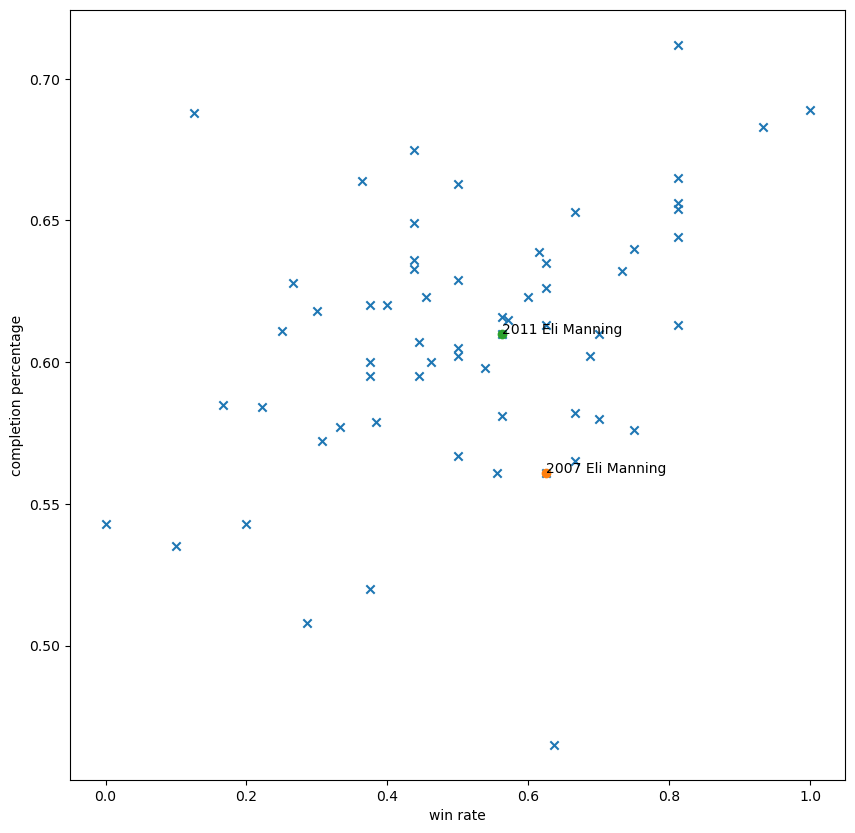

In [14]:
# test for plt and subplots
plt.subplots(figsize = (10, 10))
i = 2007
plt.scatter(marker = "x", x = QB["win_rate"], y = QB["completion%"])
#plt.legend()

win_rate = np.array(QB["win_rate"]).reshape(-1, 1)
comp_rate = np.array(QB["completion%"]).reshape(-1, 1)

for x in QB.itertuples():
    name = x[1]
    comp_rate = x[2]
    win_rate = x[8]
    if (name == "Eli Manning"):
        plt.scatter(marker="o", x = x[8], y = x[2])
        plt.annotate(str(x[9]) + " " + x[1], (x[8], x[2]))

plt.xlabel("win rate")
plt.ylabel("completion percentage")

reg = LinearRegression().fit(win_rate, comp_rate)
plt.plot(win_rate, reg.intercept_ + reg.coef_ * win_rate, '-')


In [ ]:
# what do i want to show
# i want to highlight eli's stats in comparison to every other QB that season for each statistic
# put eli's name next to his scatterplot
